/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.


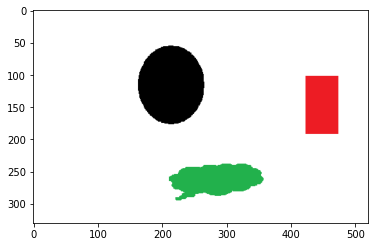

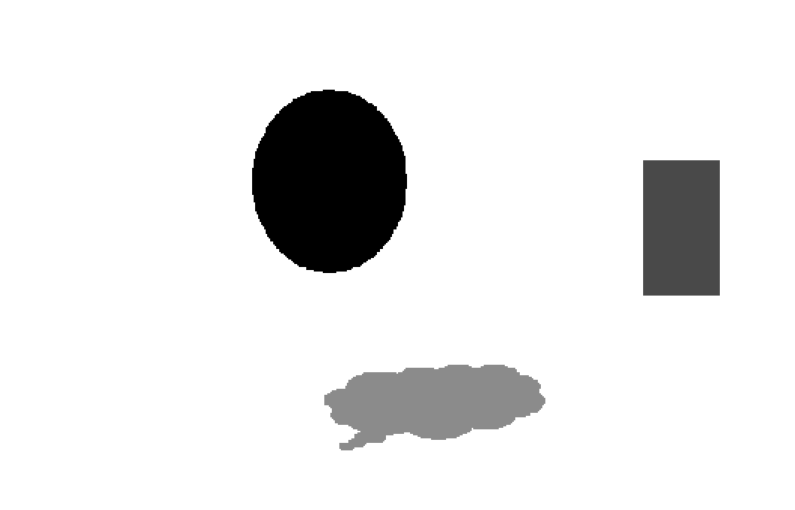

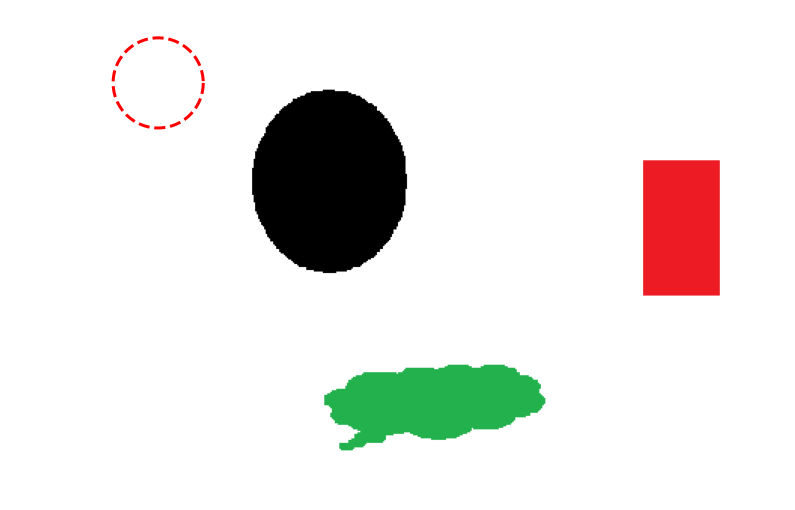

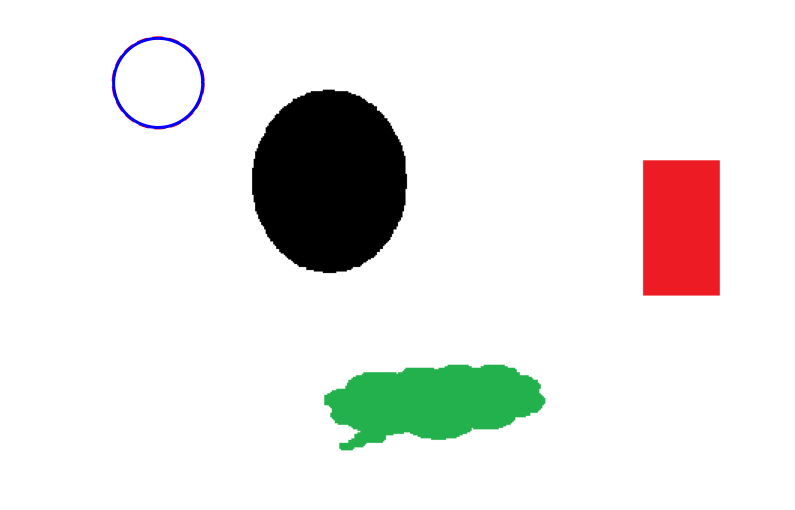

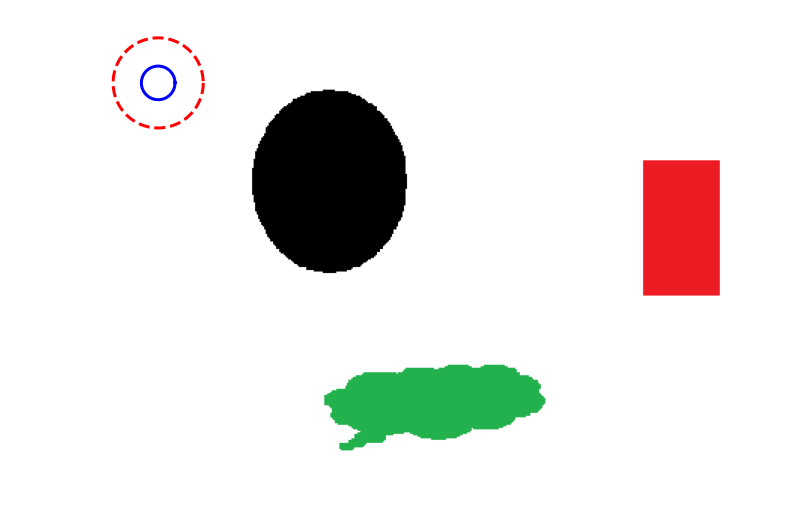

In [ ]:
# import the image
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color
from skimage import io

def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

image = io.imread('../imaee.png') 
plt.imshow(image);

image_gray = color.rgb2gray(image) 
image_show(image_gray);

def circle_points(resolution, center, radius):
    """
    Generate points which define a circle on an image.Centre refers to the centre of the circle
    """   
    radians = np.linspace(0, 2*np.pi, resolution)
    c = center[1] + radius*np.cos(radians)#polar co-ordinates
    r = center[0] + radius*np.sin(radians)
    
    return np.array([c, r]).T
# Exclude last point because a closed path should not have duplicate points
points = circle_points(200, [50, 100], 30)[:-1]
#points = circle_points(200, [80, 250], 80)[:-1]

fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)

# center of circle is [80,250]
snake = seg.active_contour(image_gray, points)
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

snake = seg.active_contour(image_gray, points,alpha=0.06,beta=0.3)
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);


In [ ]:
#normalize image
imNorm = (im - min) / (max - min)
#apply softmax
imsoft = exp(imNorm) / (exp(imNorm).sum())

In [ ]:
img

array([[[148,  74,   2],
        [148,  75,   1],
        [147,  76,   2],
        ...,
        [158,  29,  14],
        [156,  27,  12],
        [156,  27,  12]],

       [[149,  75,   3],
        [149,  76,   2],
        [148,  78,   1],
        ...,
        [159,  30,  15],
        [159,  30,  15],
        [159,  30,  15]],

       [[150,  77,   3],
        [150,  77,   3],
        [149,  79,   2],
        ...,
        [159,  31,  13],
        [158,  29,  14],
        [158,  29,  14]],

       ...,

       [[ 88,  78,  94],
        [ 85,  77,  94],
        [ 82,  75,  96],
        ...,
        [ 46,  57, 139],
        [ 44,  55, 137],
        [ 44,  55, 137]],

       [[ 81,  71,  88],
        [ 84,  76,  93],
        [ 89,  82, 103],
        ...,
        [ 46,  56, 140],
        [ 46,  56, 140],
        [ 46,  57, 139]],

       [[ 92,  81, 101],
        [100,  91, 111],
        [111, 103, 126],
        ...,
        [ 46,  56, 140],
        [ 45,  55, 139],
        [ 45,  55, 139]]